In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
#Load the Data
try:
    print("Lets see the all the Dataset Values........\n")
    df = pd.read_csv("Data set/student_data.csv")
    df.head()
except FileNotFoundError:
    print("File not found. Please ensure 'student_data.csv' is in the working directory.")
except Exception as e:
    print(f"an error occurred: {e}")


Lets see the all the Dataset Values........



In [10]:
# Shape of dataset
print(f"The Rows are {df.shape[0]} and the Columns are {df.shape[1]}")

The Rows are 2200 and the Columns are 10


In [11]:
#Display the Data Information

print("Lets see the Dataset Information........\n")
df.info()

Lets see the Dataset Information........

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             2200 non-null   int64  
 1   student_name           2200 non-null   object 
 2   age                    2090 non-null   float64
 3   gender                 2090 non-null   object 
 4   previous_grades        2090 non-null   float64
 5   attendance_percentage  2090 non-null   float64
 6   study_hours_per_week   2090 non-null   float64
 7   assignments_submitted  2090 non-null   float64
 8   exam_scores            2090 non-null   float64
 9   student_success        2200 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 172.0+ KB


In [12]:
#Describe the dataset
print("Lets Describe the All the Datasets columns........\n")
df.describe(include='all')

Lets Describe the All the Datasets columns........



,student_id,student_name,age,gender,previous_grades,attendance_percentage,study_hours_per_week,assignments_submitted,exam_scores,student_success
count,2200.000000,2200,2090.000000,2090,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2200.000000
unique,NaN,399,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Pari Kumar,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,15,NaN,1077,NaN,NaN,NaN,NaN,NaN,NaN
mean,1100.500000,NaN,20.464593,NaN,70.220574,74.746411,19.611483,9.549282,64.411483,0.278636
std,635.229617,NaN,2.299695,NaN,17.364718,14.240188,11.565215,5.839624,20.044781,0.448430
min,1.000000,NaN,17.000000,NaN,40.000000,50.000000,0.000000,0.000000,30.000000,0.000000
25%,550.750000,NaN,18.000000,NaN,56.000000,63.000000,10.000000,4.000000,47.000000,0.000000
50%,1100.500000,NaN,20.000000,NaN,71.000000,74.000000,19.000000,10.000000,65.000000,0.000000
75%,1650.250000,NaN,22.000000,NaN,86.000000,87.000000,30.000000,15.000000,82.000000,1.000000


In [13]:
#Fined the Null values
print("Lets Find the Missing Values for the dataset.......\n")
df.isnull().sum()

Lets Find the Missing Values for the dataset.......



student_id                 0
student_name               0
age                      110
gender                   110
previous_grades          110
attendance_percentage    110
study_hours_per_week     110
assignments_submitted    110
exam_scores              110
student_success            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             2200 non-null   int64  
 1   student_name           2200 non-null   object 
 2   age                    2090 non-null   float64
 3   gender                 2090 non-null   object 
 4   previous_grades        2090 non-null   float64
 5   attendance_percentage  2090 non-null   float64
 6   study_hours_per_week   2090 non-null   float64
 7   assignments_submitted  2090 non-null   float64
 8   exam_scores            2090 non-null   float64
 9   student_success        2200 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 172.0+ KB


In [15]:
#Fillup the Missing Values for Gender
print("Lets Remove the all the Null Values from the datsett.........\n")
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

Lets Remove the all the Null Values from the datsett.........



In [ ]:
try:
    #Fillup the missing Values for the Remaining Columns.
    l1 = ['age','previous_grades','attendance_percentage','study_hours_per_week','assignments_submitted','exam_scores']

    for i in l1:
        df[i] = df[i].fillna(df[i].mean())
except Exception as e:
    print(f"Error {e}.")

In [ ]:
try:
    #Check the missing Values is Fillup or not

    print("Lets Check any missing Values are there or not........\n")
    df.isnull().sum()
except Exception as e:
    print(f"Error {e}.")

Lets Check any missing Values are there or not........



student_id               0
student_name             0
age                      0
gender                   0
previous_grades          0
attendance_percentage    0
study_hours_per_week     0
assignments_submitted    0
exam_scores              0
student_success          0
dtype: int64

Distribution of Exam Scores......



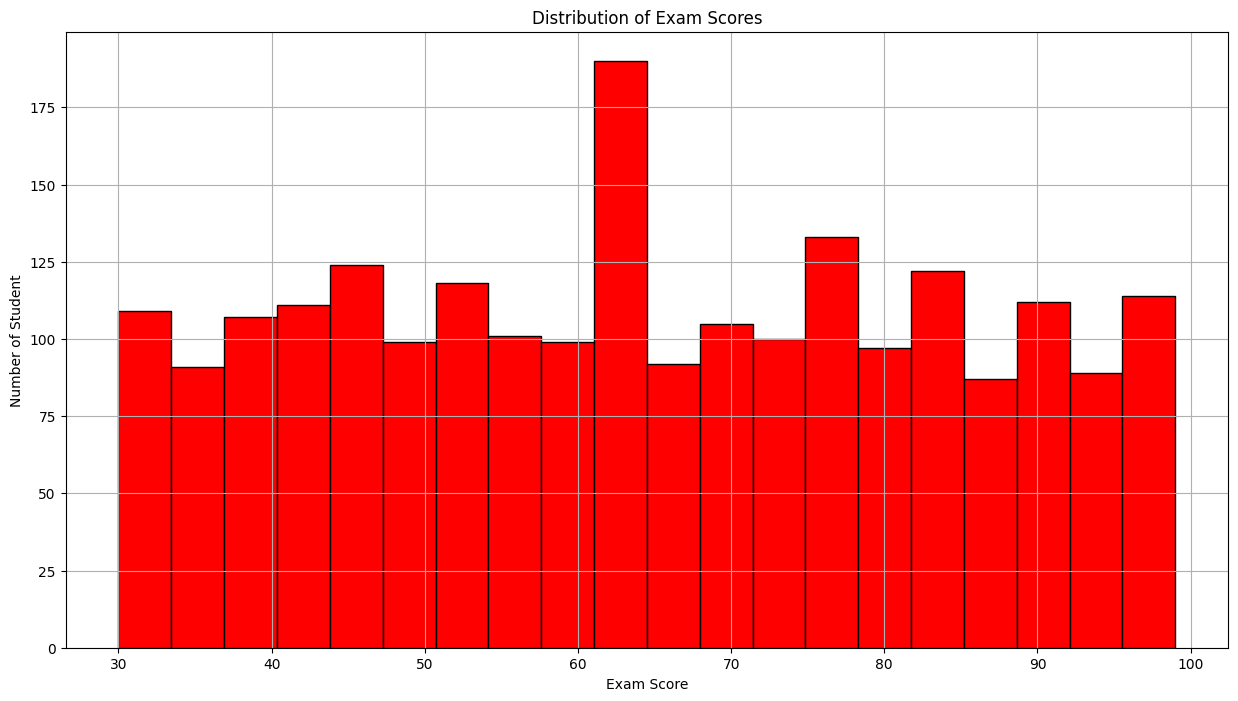

In [ ]:
try:
    #Distribution of Exam Scores with Scaled Data
    print("Distribution of Exam Scores......\n")
    plt.figure(figsize=(15,8))
    plt.hist(df['exam_scores'],bins=20,color="red",edgecolor='black',label="Distribution of Exam Scores")
    plt.title("Distribution of Exam Scores")
    plt.xlabel("Exam Score")
    plt.ylabel("Number of Student")
    plt.grid(True)
    plt.savefig("Diagram images/Distribution_of_Exam_Scores",dpi=400,bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Error {e}.")

Average Exam Scores vs Age (Pass vs Fail)......



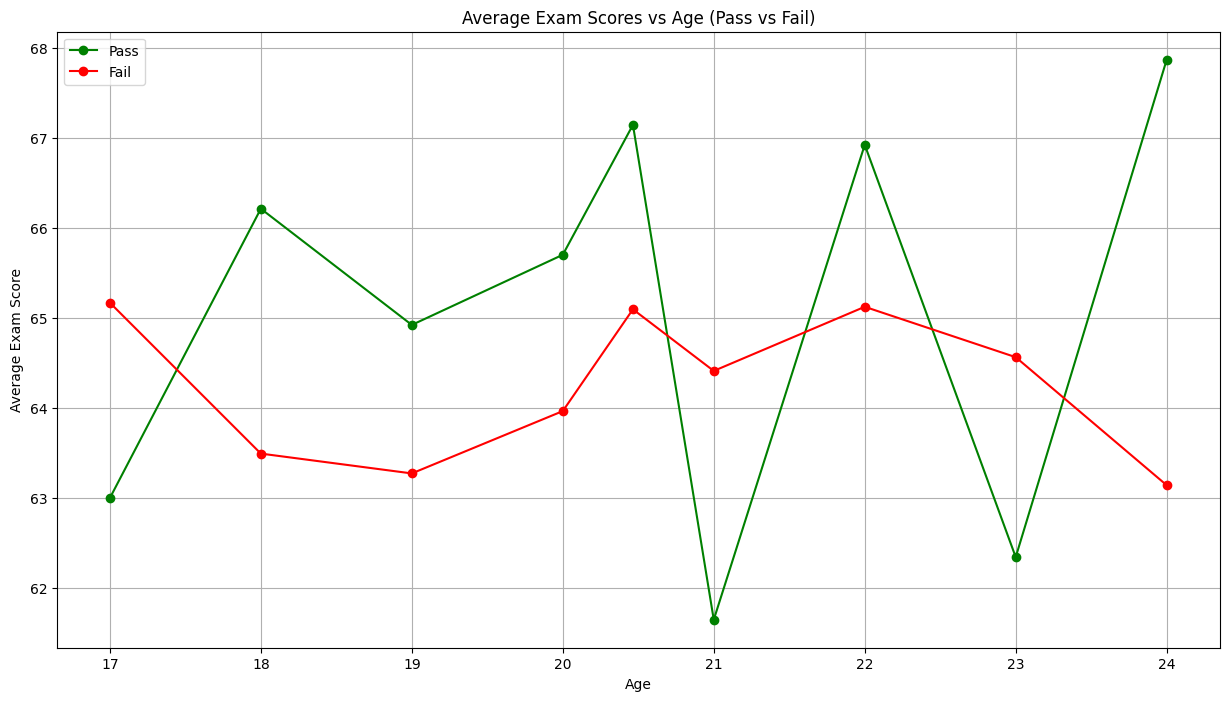

In [ ]:
try:
    #Average Exam Scores vs Age (Pass vs Fail)
    print("Average Exam Scores vs Age (Pass vs Fail)......\n")
    plt.figure(figsize=(15,8))

    pass_data = df[df['student_success']==1].groupby('age')['exam_scores'].mean()
    fail_data = df[df['student_success']==0].groupby('age')['exam_scores'].mean()

    plt.plot(pass_data.index,pass_data.values,marker='o',color='green',label='Pass')
    plt.plot(fail_data.index,fail_data.values,marker='o',color='red',label='Fail')
    plt.title("Average Exam Scores vs Age (Pass vs Fail)")
    plt.xlabel("Age")
    plt.ylabel("Average Exam Score")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.savefig("Diagram images/Average_Exam_Scores_vs_Age_(Pass vs Fail).png",dpi=400,bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Error {e}.")

In [ ]:
try:
    #Lets Convert our Object Columns into the Numaric
    #Using The LabelEncoder
    print("We are Encode the Gender Columns using the Label Encoding Technique.........\n")
    encoder = LabelEncoder()

    df['gender'] = encoder.fit_transform(df['gender'])
    df['student_success'] = encoder.fit_transform(df['student_success'])  #Pass=1, Fail=0

    print("Lets see our encoded Data..... ")
    df.head()
except Exception as e:
    print(f"Error {e}.")

We are Encode the Gender Columns using the Label Encoding Technique.........

Lets see our encoded Data..... 


,student_id,student_name,age,gender,previous_grades,attendance_percentage,study_hours_per_week,assignments_submitted,exam_scores,student_success
0,1,Saanvi Das,23.0,1,69.0,56.000000,18.0,6.0,73.0,0
1,2,Ananya Sharma,20.0,0,53.0,71.000000,33.0,18.0,51.0,0
2,3,Rohan Kumar,21.0,1,98.0,59.000000,34.0,5.0,67.0,0
3,4,Vivaan Chopra,23.0,1,59.0,74.746411,0.0,10.0,48.0,0
4,5,Ira Reddy,19.0,1,88.0,64.000000,20.0,10.0,60.0,0


In [21]:
print("Let see the Datatypes of the all Data Columns.")
df.info()

Let see the Datatypes of the all Data Columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             2200 non-null   int64  
 1   student_name           2200 non-null   object 
 2   age                    2200 non-null   float64
 3   gender                 2200 non-null   int64  
 4   previous_grades        2200 non-null   float64
 5   attendance_percentage  2200 non-null   float64
 6   study_hours_per_week   2200 non-null   float64
 7   assignments_submitted  2200 non-null   float64
 8   exam_scores            2200 non-null   float64
 9   student_success        2200 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [ ]:
try:
    #Lets do the FetureScaling for the Numaric Columns

    features = ['age', 'gender', 'previous_grades', 'attendance_percentage', 'study_hours_per_week', 'assignments_submitted', 'exam_scores']

    scaler = StandardScaler()

    df_scaled = df.copy()

    df_scaled[features] = scaler.fit_transform(df_scaled[features])
except Exception as e:
    print(f"Error {e}.")

In [23]:
#Lets see the data after Scaling
print("Lets see Data After Scaling.........\n")
print(df_scaled.head())

Lets see Data After Scaling.........

   student_id   student_name       age    gender  previous_grades  \
0           1     Saanvi Das  1.131409  1.082482        -0.072134   
1           2  Ananya Sharma -0.207322 -0.923803        -1.017705   
2           3    Rohan Kumar  0.238922  1.082482         1.641715   
3           4  Vivaan Chopra  1.131409  1.082482        -0.663116   
4           5      Ira Reddy -0.653565  1.082482         1.050732   

   attendance_percentage  study_hours_per_week  assignments_submitted  \
0          -1.350966e+00             -0.142993              -0.623732   
1          -2.699864e-01              1.188012               1.485083   
2          -1.134770e+00              1.276746              -0.799466   
3           1.024110e-15             -1.740199               0.079207   
4          -7.744437e-01              0.034475               0.079207   

   exam_scores  student_success  
0     0.439703                0  
1    -0.686622                0  
2     

In [ ]:
try:
    #Lets train the model
    print("Lets Train the Model........\n")
    X = df_scaled[features]   #This is our Feture Column
    y = df_scaled['student_success']  #This is our Target Column

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
except Exception as e:
    print(f"Error {e}.")

Lets Train the Model........

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       312
           1       0.72      0.65      0.68       128

    accuracy                           0.82       440
   macro avg       0.79      0.77      0.78       440
weighted avg       0.82      0.82      0.82       440



In [25]:
#Lets Find the Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("The Confusion Matrix is:")
print(conf_matrix)

The Confusion Matrix is:
[[280  32]
 [ 45  83]]


Confusion Matrix....



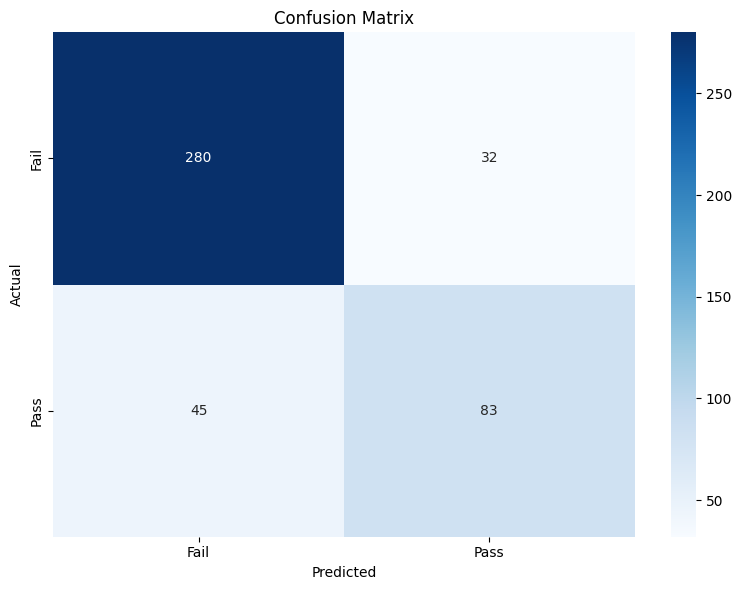

In [ ]:
try:
    #Lets Draw the Charts for Confusion Matrix
    print("Confusion Matrix....\n")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("Diagram images/Confusion_Matrix.png", dpi=800, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Error {e}.")

In [48]:
#User Input for the Prediction

print("-----------------Lets Predict The Result For Student-----------------")

try:
    age = float(input("Enter the Age of the Student: "))
    gender = float(input("Enter the Gender of the Student (Female=0, Male=1): "))
    previous_grades = float(input("Enter the previous grades of the Student: "))
    attendance_percentage = float(input("Enter the attendance percentage of the Student: "))
    study_hours_per_week = float(input("Enter the study hours per week of the Student: "))
    assignments_submitted = float(input("Enter the assignments submitted marks of the Student (out of 20): "))
    exam_scores = float(input("Enter the Last exam scores of the Student: "))

    # Ensure the same column order as training
    user_input_df = pd.DataFrame([{
        'age': age,
        'gender': gender,
        'previous_grades': previous_grades,
        'attendance_percentage': attendance_percentage,
        'study_hours_per_week': study_hours_per_week,
        'assignments_submitted': assignments_submitted,
        'exam_scores': exam_scores
    }])[features]

    # Scale user input
    user_input_scaled = scaler.transform(user_input_df)

    # Predict
    prediction = model.predict(user_input_scaled)[0]
    result = "Pass" if prediction == 1 else "Fail"

    print(f"Prediction Based on Input = {result}")

except Exception as e:
    print("An error occurred:", e)


-----------------Lets Predict The Result For Student-----------------


Enter the Age of the Student:  21
Enter the Gender of the Student (Female=0, Male=1):  1
Enter the previous grades of the Student:  90
Enter the attendance percentage of the Student:  89
Enter the study hours per week of the Student:  30
Enter the assignments submitted marks of the Student (out of 20):  19
Enter the Last exam scores of the Student:  82


Prediction Based on Input = Pass


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
try:
    print("Lets make a pickle model for this..............\n")

    models = {
        "Lable_encoder":encoder,
        "Logistic_regression":model,
        "Standard_scaler":scaler
    }

    with open("model/model.pkl",'wb') as f:
        pickle.dump(models,f)
        print("Model is Succesfully Saved as model.pkl file in the Model Folder.")
except Exception as e:
    print(f"Error {e}.")

Lets make a pickle model for this..............

Model is Succesfully Saved as model.pkl file in the Model Folder.
